### Goal
- prepare stats data for machine learning

### Steps
- : review dtypes,and prepare continuous numeric, discrete numeric, categorical, character and identity columns
Input: nfl_weekly_stats.parquet
Work:
    - separate continuous numeric, discrete numeric, categorical, character and identity columns
    - label encode
    - merge all back together
Output:
    - nfl_ml_weekly_stats.parquet - cleaned, labeled data

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from src import *


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:

db = database_loader.DatabaseLoader(get_config('connection_string'))
DEBUG = False
SCHEMA = 'controls'




In [4]:
file_name = "nfl_weekly_offense"
data_directory = get_config('data_directory')

input_path = os.path.join(data_directory,  f"{file_name}.parquet")
assert  os.path.exists(input_path)
stats_df = pd.read_parquet(input_path)


#### drop columns we dont need

In [5]:
import numpy as np

stats_df.drop(columns=['team', 'spread','team_coach', 'opposing_coach', 'count', 'team_score', 'opposing_team', 'opposing_score'], inplace=True)

stats_df.head()

,season,week,passing_yards,avg_rushing_epa,receiving_first_downs,passing_yards_after_catch,ps_completions,ps_attempts,receiving_yards,receiving_yards_after_catch,...,passer_rating,avg_rush_yards,rush_attempts,efficiency,rush_yards,rush_touchdowns,percent_attempts_gte_eight_defenders,player_jersey_number,avg_time_to_los,win
index,,,,,,,,,,,,,,,,,,,,,
0,2016,1,271.0,0.209866,14.0,105.0,24.0,37.0,271.0,105.0,...,104.673423,5.562500,16.0,3.107978,89.0,1.0,43.750000,31.0,2.616188,loss
1,2016,2,315.0,-0.273297,15.0,157.0,18.0,34.0,315.0,157.0,...,124.861111,3.375000,16.0,4.591296,54.0,1.0,50.000000,23.0,2.450687,win
2,2016,3,287.0,-0.916674,17.0,90.0,26.0,50.0,287.0,90.0,...,36.000000,4.368421,19.0,4.171807,83.0,2.0,26.315789,31.0,2.619000,loss
3,2016,4,325.0,-0.472056,17.0,116.0,27.0,47.0,325.0,116.0,...,86.342593,4.882353,17.0,3.722651,83.0,0.0,29.411765,31.0,2.700235,loss
4,2016,5,124.0,0.499843,6.0,49.0,11.0,28.0,124.0,49.0,...,77.083333,5.814815,27.0,3.179936,157.0,2.0,22.222222,31.0,2.667074,win


In [6]:

holdout_df = stats_df[['season', 'week']]
raw_target_df = stats_df[['win']]
raw_features_df = stats_df.drop(columns=['win','season', 'week'])

print(holdout_df.shape)
print(raw_target_df.shape)
print(raw_features_df.shape)
print('stats_df      ', stats_df.shape)

(3812, 2)
(3812, 1)
(3812, 51)
stats_df       (3812, 54)


In [7]:
from sklearn.preprocessing import MinMaxScaler

columns = raw_features_df.columns

scaler = MinMaxScaler()

features = scaler.fit_transform(raw_features_df.to_numpy())
features_df = pd.DataFrame(features, columns=columns)

print("Scaled Dataset Using MinMaxScaler")
features_df.head()

Scaled Dataset Using MinMaxScaler


,passing_yards,avg_rushing_epa,receiving_first_downs,passing_yards_after_catch,ps_completions,ps_attempts,receiving_yards,receiving_yards_after_catch,passing_tds,passing_epa,...,avg_completed_air_yards,passer_rating,avg_rush_yards,rush_attempts,efficiency,rush_yards,rush_touchdowns,percent_attempts_gte_eight_defenders,player_jersey_number,avg_time_to_los
0,0.503906,0.566348,0.464286,0.348432,0.500000,0.523077,0.503906,0.348432,0.333333,0.640501,...,0.485718,0.661095,0.377715,0.214286,0.009004,0.349206,0.166667,0.486111,0.344828,0.358164
1,0.589844,0.470279,0.500000,0.529617,0.369565,0.476923,0.589844,0.529617,0.500000,0.673890,...,0.675393,0.788596,0.227092,0.214286,0.019321,0.210317,0.166667,0.555556,0.252874,0.271172
2,0.535156,0.342355,0.571429,0.296167,0.543478,0.723077,0.535156,0.296167,0.000000,0.433609,...,0.491549,0.227368,0.295495,0.321429,0.016403,0.325397,0.333333,0.292398,0.344828,0.359642
3,0.609375,0.430760,0.571429,0.386760,0.565217,0.676923,0.609375,0.386760,0.166667,0.503315,...,0.534844,0.545322,0.330882,0.250000,0.013279,0.325397,0.000000,0.326797,0.344828,0.402342
4,0.216797,0.624004,0.178571,0.153310,0.217391,0.384615,0.216797,0.153310,0.333333,0.485816,...,0.476565,0.486842,0.395088,0.607143,0.009504,0.619048,0.333333,0.246914,0.344828,0.384911


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
targets = label_encoder.fit_transform(raw_target_df)
target_df = pd.DataFrame(targets, columns=['win'])

import joblib

joblib.dump(label_encoder, 'win_label_encoder.pkl')  # Save the label encoder to a file

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


['win_label_encoder.pkl']

In [9]:
print(type(target_df))
print(type(features_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


#### dependent_columns_df: split out the potential y dependent columns

In [10]:
dataframes = [
    holdout_df,
    features_df,
    target_df,
]

merge_df = pd.concat(dataframes, axis=1)

assert stats_df.shape[1] == merge_df.shape[1]
assert stats_df.shape[0] == merge_df.shape[0]

merge_df.shape

(3812, 54)

In [11]:
merge_df.head()

,season,week,passing_yards,avg_rushing_epa,receiving_first_downs,passing_yards_after_catch,ps_completions,ps_attempts,receiving_yards,receiving_yards_after_catch,...,passer_rating,avg_rush_yards,rush_attempts,efficiency,rush_yards,rush_touchdowns,percent_attempts_gte_eight_defenders,player_jersey_number,avg_time_to_los,win
0,2016,1,0.503906,0.566348,0.464286,0.348432,0.500000,0.523077,0.503906,0.348432,...,0.661095,0.377715,0.214286,0.009004,0.349206,0.166667,0.486111,0.344828,0.358164,0
1,2016,2,0.589844,0.470279,0.500000,0.529617,0.369565,0.476923,0.589844,0.529617,...,0.788596,0.227092,0.214286,0.019321,0.210317,0.166667,0.555556,0.252874,0.271172,2
2,2016,3,0.535156,0.342355,0.571429,0.296167,0.543478,0.723077,0.535156,0.296167,...,0.227368,0.295495,0.321429,0.016403,0.325397,0.333333,0.292398,0.344828,0.359642,0
3,2016,4,0.609375,0.430760,0.571429,0.386760,0.565217,0.676923,0.609375,0.386760,...,0.545322,0.330882,0.250000,0.013279,0.325397,0.000000,0.326797,0.344828,0.402342,0
4,2016,5,0.216797,0.624004,0.178571,0.153310,0.217391,0.384615,0.216797,0.153310,...,0.486842,0.395088,0.607143,0.009504,0.619048,0.333333,0.246914,0.344828,0.384911,2


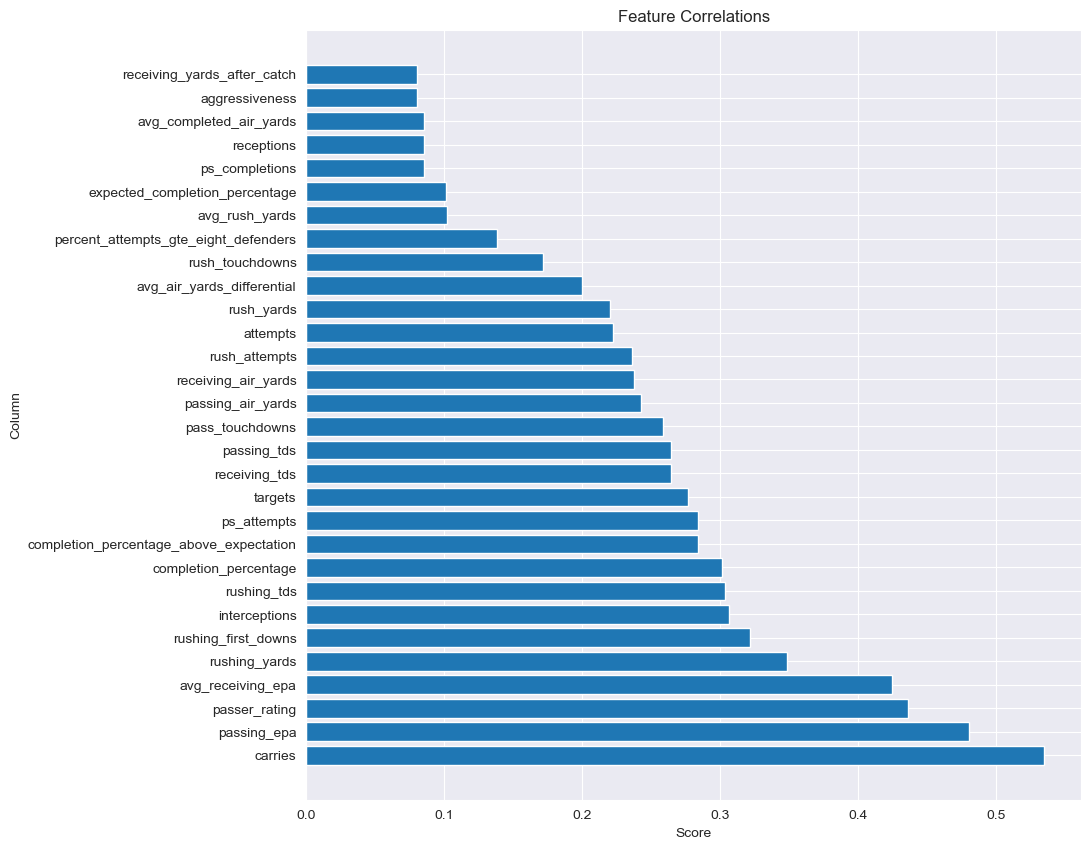

In [12]:


from src.utils_eda import correlate_to_target, plot_correlations

top_correlations, set_correlations = correlate_to_target(merge_df, 'win', 30)
plot_correlations(top_correlations['corr'], top_correlations['y'], 'Feature Correlations')


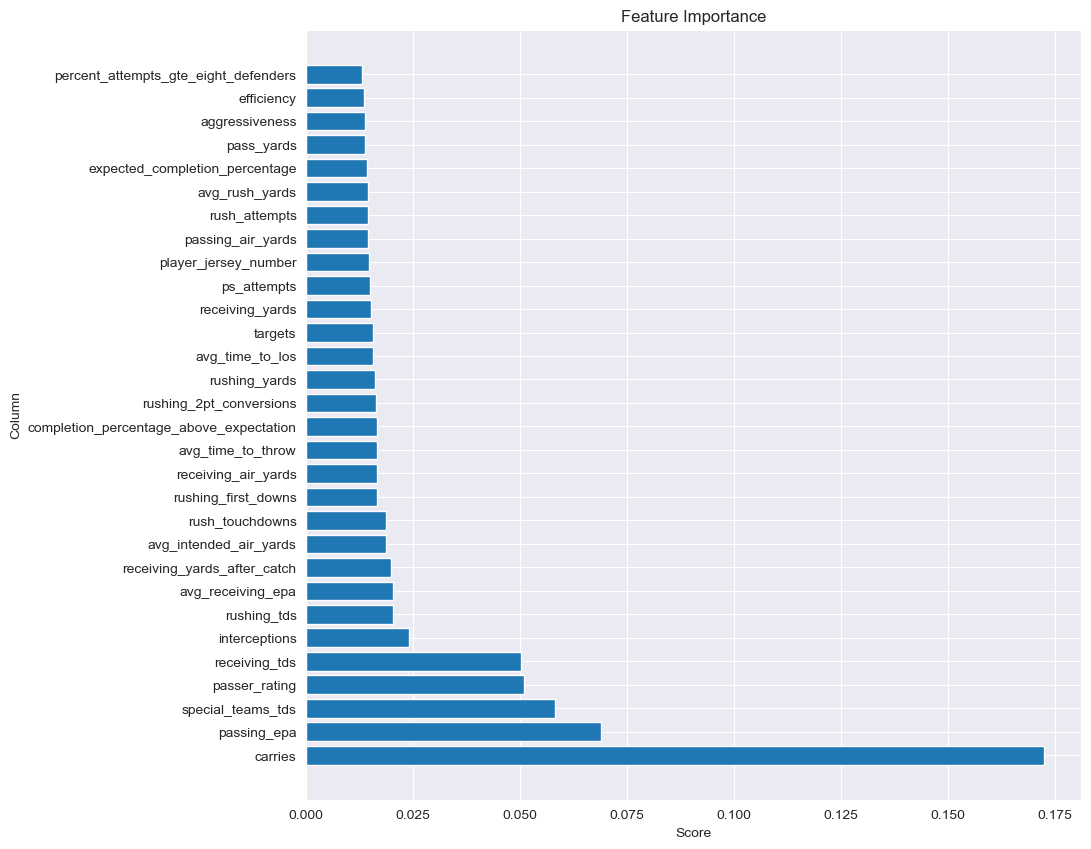

In [13]:
from src.utils_eda import calc_feature_importance

top_features, set_features = calc_feature_importance(features_df, target_df, top_n=30)
plot_correlations(top_features['corr'], top_features['y'], "Feature Importance")

In [14]:
top_features

,y,corr
0,carries,0.172584
1,passing_epa,0.068850
2,special_teams_tds,0.058141
3,passer_rating,0.050907
4,receiving_tds,0.050161
5,interceptions,0.024017
6,rushing_tds,0.020303
7,avg_receiving_epa,0.020262
8,receiving_yards_after_catch,0.019823
9,avg_intended_air_yards,0.018740


In [15]:
from src.build_power_scores import concat_power_score

concat_power_score(features_df, summary_data=top_features, threshold=.01, power_column="offense_power")

,passing_yards,avg_rushing_epa,receiving_first_downs,passing_yards_after_catch,ps_completions,ps_attempts,receiving_yards,receiving_yards_after_catch,passing_tds,passing_epa,...,passer_rating,avg_rush_yards,rush_attempts,efficiency,rush_yards,rush_touchdowns,percent_attempts_gte_eight_defenders,player_jersey_number,avg_time_to_los,offense_power
0,0.503906,0.566348,0.464286,0.348432,0.500000,0.523077,0.503906,0.348432,0.333333,0.640501,...,0.661095,0.377715,0.214286,0.009004,0.349206,0.166667,0.486111,0.344828,0.358164,0.286186
1,0.589844,0.470279,0.500000,0.529617,0.369565,0.476923,0.589844,0.529617,0.500000,0.673890,...,0.788596,0.227092,0.214286,0.019321,0.210317,0.166667,0.555556,0.252874,0.271172,0.344141
2,0.535156,0.342355,0.571429,0.296167,0.543478,0.723077,0.535156,0.296167,0.000000,0.433609,...,0.227368,0.295495,0.321429,0.016403,0.325397,0.333333,0.292398,0.344828,0.359642,0.271044
3,0.609375,0.430760,0.571429,0.386760,0.565217,0.676923,0.609375,0.386760,0.166667,0.503315,...,0.545322,0.330882,0.250000,0.013279,0.325397,0.000000,0.326797,0.344828,0.402342,0.288286
4,0.216797,0.624004,0.178571,0.153310,0.217391,0.384615,0.216797,0.153310,0.333333,0.485816,...,0.486842,0.395088,0.607143,0.009504,0.619048,0.333333,0.246914,0.344828,0.384911,0.326264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,0.511719,0.607919,0.428571,0.508711,0.565217,0.584615,0.511719,0.508711,0.333333,0.543284,...,0.638960,0.309473,0.392857,0.014302,0.376984,0.000000,0.264550,0.080460,0.396856,0.337388
3808,0.460938,0.648005,0.321429,0.264808,0.347826,0.400000,0.460938,0.264808,0.166667,0.399120,...,0.620236,0.505385,0.071429,0.006973,0.349206,0.000000,0.000000,0.080460,0.499268,0.269042
3809,0.539062,0.167211,0.607143,0.334495,0.521739,0.476923,0.539062,0.334495,0.500000,0.643836,...,0.723684,0.176233,0.428571,0.025697,0.226190,0.000000,0.303030,0.080460,0.543639,0.341585
3810,0.253906,0.427090,0.285714,0.156794,0.326087,0.384615,0.253906,0.156794,0.000000,0.433278,...,0.198308,0.244306,0.500000,0.017367,0.341270,0.000000,0.601852,0.080460,0.337520,0.279105


In [ ]:
%%time

file_name = "nfl_ml_offense_stats"

data_directory = get_config('data_directory')
if not os.path.exists(data_directory):
    os.makedirs(data_directory)

output_path = os.path.join(data_directory, f"{file_name}.parquet")
merge_df.to_parquet(output_path, engine='fastparquet', compression='snappy')